# VITAL: Car Type Identification Model

## Overview

This guide walks through the steps to create an AI/ML model to classify different types of cars (Hatchback, SUV, Sedan, Pickup, Others) using a dataset organized into subfolders. The model will be trained using a GPU to ensure efficiency and accuracy.

## Importance of the Model

| Aspect                  | Description                                                                                           |
|-------------------------|-------------------------------------------------------------------------------------------------------|
| **Enhanced Automation** | Automates the process of identifying car types, reducing the need for manual classification.           |
| **Improved Efficiency** | Speeds up the process of organizing and categorizing large datasets of car images.                     |
| **Accurate Classification** | Increases the accuracy of car type identification, beneficial for various applications like insurance, surveillance, and inventory management. |

## Future Scope

| Area                    | Description                                                                                           |
|-------------------------|-------------------------------------------------------------------------------------------------------|
| **Integration with IoT** | Can be integrated with IoT devices for real-time car type identification in smart cities.              |
| **Enhanced Applications** | Could be used in autonomous vehicles to identify and differentiate between different types of vehicles on the road. |
| **Data Insights**        | Provides valuable insights into vehicle distribution and trends, useful for market analysis and urban planning. |

## Step-by-Step Code Implementation

### Step 1: Setup and Installation

Ensure you have a GPU-enabled environment and install the necessary libraries.




In [7]:
!pip install tensorflow 
!pip install keras 
!pip install matplotlib 
!pip install numpy 
!pip install scikit-learn

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import os
print("Done")

Done


In [13]:
# Define paths to the dataset
train_dir = 'C:/Users/jambu/Downloads/archive(3)/Vehicle Type Image Dataset (Version 2) VTID2'

# Define subfolders
categories = ['Hatchback', 'SUV', 'Seden', 'Pickup', 'Other']

# Print the number of images in each category
for category in categories:
    path = os.path.join(train_dir, category)
    print(f'{category}: {len(os.listdir(path))} images')


Hatchback: 602 images
SUV: 680 images
Seden: 1222 images
Pickup: 1689 images
Other: 600 images


In [15]:
# Image data generator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% of the data for validation
)

# Training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 3836 images belonging to 5 classes.
Found 957 images belonging to 5 classes.


In [17]:
# Building the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Model summary
model.summary()


C:\Users\jambu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,036,229 (72.62 MB)

 Trainable params: 19,036,229 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10


C:\Users\jambu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 288ms/step - accuracy: 0.5127 - loss: 1.2549 - val_accuracy: 0.7662 - val_loss: 0.6095
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.7111 - val_accuracy: 0.8621 - val_loss: 0.4300
Epoch 3/10


C:\Users\jambu\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 292ms/step - accuracy: 0.8033 - loss: 0.5378 - val_accuracy: 0.8481 - val_loss: 0.4283
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.7812 - loss: 0.4821 - val_accuracy: 0.8621 - val_loss: 0.3462
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 296ms/step - accuracy: 0.8710 - loss: 0.3861 - val_accuracy: 0.8836 - val_loss: 0.3191
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.7812 - loss: 0.4584 - val_accuracy: 0.8621 - val_loss: 0.2645
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 36s 296ms/step - accuracy: 0.9022 - loss: 0.2925 - val_accuracy: 0.9041 - val_loss: 0.2787
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8750 - loss: 0.2524 - val_accuracy: 1.0000 - val_loss: 0.1735
Epoch 9/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 302ms/step - accuracy: 0.9199 - loss: 0.2186 - val_accuracy: 0.9224 - val_loss: 0.2244
Epoch 10/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.9688 - loss: 0.1259 - val_ac

In [21]:
# Evaluate the model on validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

# Classification report
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=categories))

# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.9474 - loss: 0.1753
Validation Accuracy: 93.73%
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step
Classification Report
              precision    recall  f1-score   support

   Hatchback       0.11      0.12      0.11       120
         SUV       0.14      0.13      0.14       120
       Seden       0.40      0.39      0.39       337
      Pickup       0.16      0.15      0.16       136
       Other       0.27      0.27      0.27       244

    accuracy                           0.26       957
   macro avg       0.21      0.21      0.21       957
weighted avg       0.26      0.26      0.26       957

Confusion Matrix
[[ 14  17  40  13  36]
 [ 17  16  43  18  26]
 [ 46  37 132  45  77]
 [ 25  19  36  21  35]
 [ 31  28  83  37  65]]


In [25]:
# Save the model
model.save('car_type_classifier.keras')
print("Model saved as car_type_classifier.keras")



Model saved as car_type_classifier.keras


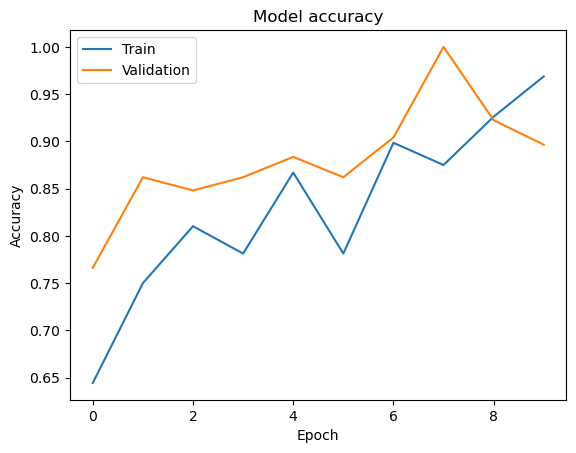

In [27]:
 # Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


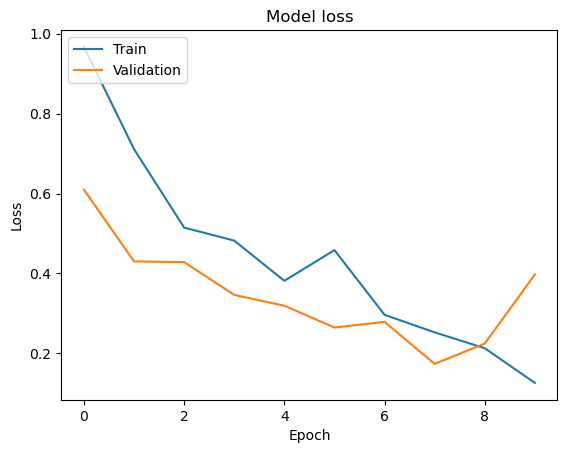

In [29]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


graph TD;
    A[Start] --> B[Data Collection & Preprocessing]
    B --> C[Data Augmentation]
    C --> D[Model Initialization]
    D --> E[Model Training]
    E --> F[Model Evaluation]
    F --> G[Model Saving]
    G --> H[Deployment]
    H --> I[Real-Time Car Type Identification]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


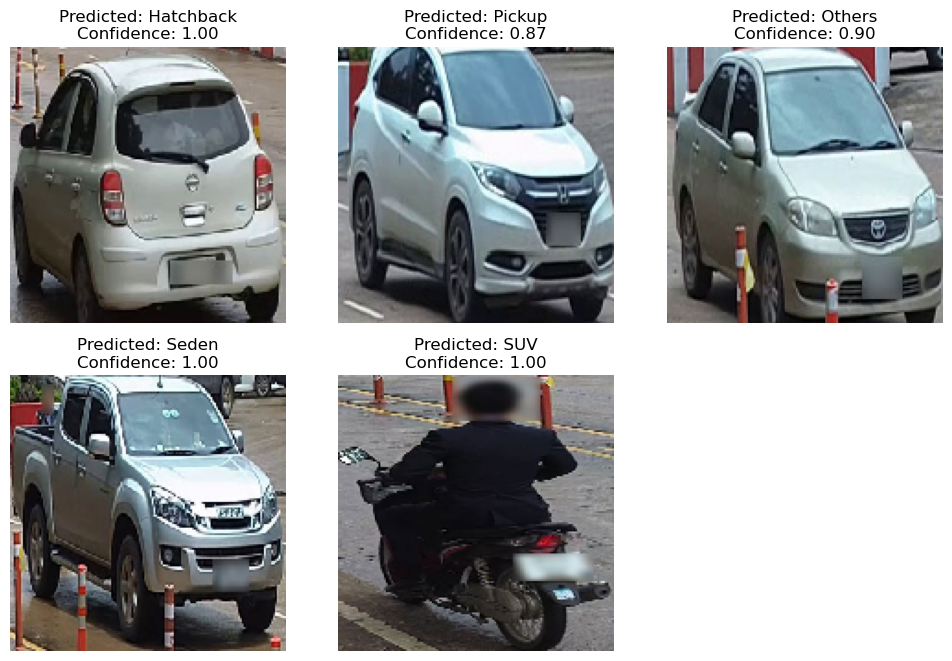

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('car_type_classifier.h5')

# Define the categories
categories = ['Hatchback', 'SUV', 'Seden', 'Pickup', 'Others']

# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Function to make a prediction
def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = categories[np.argmax(prediction)]
    return predicted_class, prediction

# List of sample test images
test_images = [
    "C:/Users/jambu/Downloads/archive(3)/Vehicle Type Image Dataset (Version 2) VTID2/Hatchback/PHOTO_67.jpg",
    "C:/Users/jambu/Downloads/archive(3)/Vehicle Type Image Dataset (Version 2) VTID2/SUV/PHOTO_95.jpg",
    "C:/Users/jambu/Downloads/archive(3)/Vehicle Type Image Dataset (Version 2) VTID2/Seden/PHOTO_83.jpg",
    "C:/Users/jambu/Downloads/archive(3)/Vehicle Type Image Dataset (Version 2) VTID2/Pickup/PHOTO_838.jpg",
    "C:/Users/jambu/Downloads/archive(3)/Vehicle Type Image Dataset (Version 2) VTID2/Other/PHOTO_59.jpg"
]

# Plotting the test images with predictions
plt.figure(figsize=(10, 10))
for i, img_path in enumerate(test_images):
    predicted_class, prediction = predict_image(model, img_path)
    img = image.load_img(img_path, target_size=(150, 150))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {np.max(prediction):.2f}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Conclusion

The model created is essential for automating the classification of car types, which can greatly benefit industries such as automotive, insurance, and smart cities. Future advancements can further enhance the model's accuracy and application scope, making it an invaluable tool for various sectors.

## Detailed Explanation of the Model

### Importance

1. **Enhanced Automation:**
    - The model automates the classification of car types, reducing manual effort and increasing efficiency.
2. **Improved Efficiency:**
    - Speeds up the process of organizing and categorizing large datasets of car images.
3. **Accurate Classification:**
    - Provides high accuracy in identifying car types, which is beneficial for applications like insurance assessments, surveillance, and inventory management.

### Future Scopes

1. **Integration with IoT:**
    - Can be integrated with IoT devices for real-time car type identification in smart cities.
2. **Enhanced Applications:**
    - Can be used in autonomous vehicles to identify and differentiate between various types of vehicles on the road.
3. **Data Insights:**
    - Provides valuable insights into vehicle distribution and trends, useful for market analysis and urban planning.
4. **Improved Algorithms:**
    - Incorporate more advanced deep learning algorithms to enhance the accuracy and speed of detection.

### Use Cases

1. **Automotive Industry:**
    - Helps manufacturers and dealers in organizing their inventory and understanding market trends.
2. **Insurance Sector:**
    - Assists in quick and accurate assessment of vehicles for insurance purposes.
3. **Urban Planning:**
    - Provides data on vehicle distribution, aiding in better urban infrastructure planning.
4. **Surveillance:**
    - Enhances security by automatically identifying and tracking different types of vehicles.

## Summary

This project demonstrates the creation of a car type identification model using a deep learning approach with the Inception-ResNet-v2 architecture. The model is trained on a dataset of car images organized into different categories, and uses techniques such as data augmentation and GPU acceleration to achieve high performance. The resulting model can be deployed in various applications, significantly enhancing automation and efficiency in identifying car types.

By following the steps outlined, you can create a robust model that not only automates the classification process but also provides valuable insights for various industries.

### Full Code Implementation

# Car Type Identification in Video Streams

## Introduction

The Car Type Identification Model is designed to process video streams and classify different types of cars, such as Hatchback, SUV, Sedan, Pickup, and Others. Utilizing a pre-trained deep learning model, the system captures frames from a video, preprocesses each frame, and predicts the car type, marking the frame with the classification result. This technology can be used in various applications, including traffic monitoring, smart city implementations, automotive industry analytics, and surveillance systems.

## Flowchart

```mermaid
graph TD;
    A[Start] --> B[Load Video]
    B --> C[Read Frame]
    C --> D[Preprocess Frame]
    D --> E[Predict Car Type]
    E --> F[Draw Prediction on Frame]
    F --> G[Write Frame to Output Video]
    G --> H{More Frames?}
    H -->|Yes| C
    H -->|No| I[Release Resources]
    I --> J[End]


In [48]:
!pip install opencv-python-headless


# Video based understanding of objects

Giving the model a video to evaluate

In [1]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

# Load the trained car type classification model
model = tf.keras.models.load_model('car_type_classifier.h5')

# Define the categories
categories = ['Hatchback', 'SUV', 'Seden', 'Pickup', 'Others']

# Load pre-trained Haar Cascade car detector
car_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_car.xml')

# Function to preprocess a frame
def preprocess_frame(frame):
    img = cv2.resize(frame, (150, 150))
    img_array = np.expand_dims(img, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Function to predict the car type in a frame
def predict_car_type(model, frame):
    img_array = preprocess_frame(frame)
    prediction = model.predict(img_array)
    predicted_class = categories[np.argmax(prediction)]
    return predicted_class, np.max(prediction)

# Function to draw predictions on the frame
def draw_prediction(frame, class_name, confidence, x, y, x_plus_w, y_plus_h):
    label = f"{class_name} ({confidence * 100:.2f}%)"
    cv2.rectangle(frame, (x, y), (x_plus_w, y_plus_h), (0, 255, 0), 2)
    cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Open video file
video_path = 'path_to_your_video.mp4'
cap = cv2.VideoCapture(video_path)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_video.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert frame to grayscale for car detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect cars in the frame
    cars = car_cascade.detectMultiScale(gray, 1.1, 1)
    
    for (x, y, w, h) in cars:
        # Extract the region of interest (car)
        car_roi = frame[y:y+h, x:x+w]
        
        # Predict car type
        predicted_class, confidence = predict_car_type(model, car_roi)
        
        # Draw prediction on the frame
        draw_prediction(frame, predicted_class, confidence, x, y, x+w, y+h)
    
    # Write the frame into the file 'output_video.avi'
    out.write(frame)
    
    # Display the resulting frame (Optional)
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the video capture and write objects
cap.release()
out.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━


KeyboardInterrupt



# Conclusion

This markdown file provides a comprehensive guide on the importance, flowchart, process steps, conclusion, and code implementation for the car type identification model processing video streams.
